Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\gavan\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gavan\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gavan\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

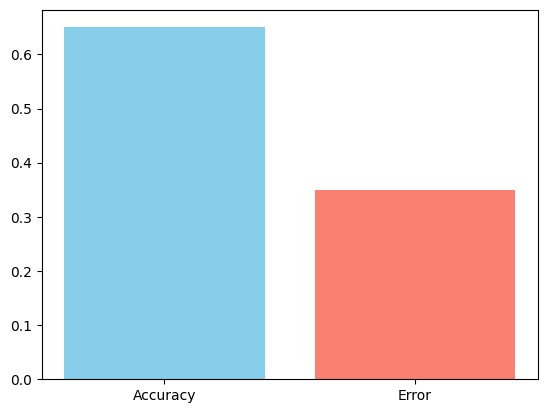

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

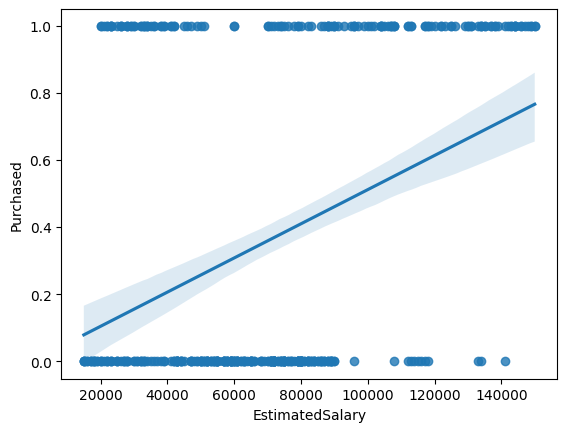

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_csv('user_data.csv')

# Select features and target
X = df[['Age', 'EstimatedSalary']]  # or add more if needed
y = df['Purchased']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train MLP model
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

acc=accuracy_score(y_test, y_pred)
error =1-acc
print("Accuracy:",acc )
print(classification_report(y_test, y_pred))

plt.bar(['Accuracy', 'Error'], [acc, error], color=['skyblue', 'salmon'])
plt.show()



C:\Users\gavan\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


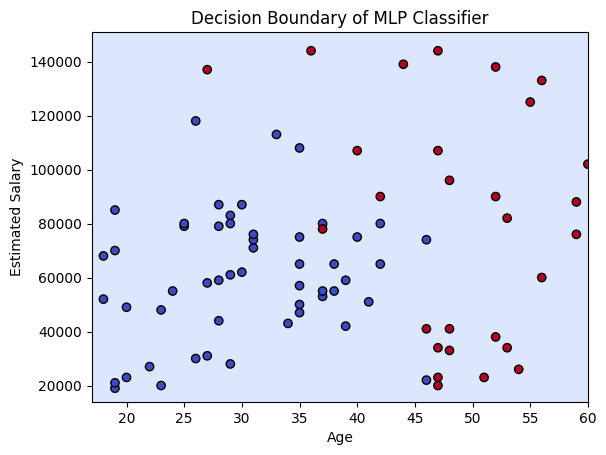

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid range
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['EstimatedSalary'].min() - 1000, X['EstimatedSalary'].max() + 1000

# Create meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),np.arange(y_min, y_max, 100))

# Predict for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Boundary of MLP Classifier')
plt.show()
